In [1]:
cd ../..

c:\Users\Yago\Desktop\GISD\TFG\code\cfe_rl


c:\Users\Yago\Desktop\GISD\TFG\code\cfe_rl\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.agents import load_saved_experiment, evaluate_agent
from src.utils import plot_signal

In [3]:
def calculate_cfe(x1, x2, mask):
    return np.where(mask, x2, x1)

In [4]:
experiment = "c99414020d8c"

agent, env, data = load_saved_experiment(experiment)
agent, env, data

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Agent loaded successfully from results\c99414020d8c\model.zip


(<stable_baselines3.dqn.dqn.DQN at 0x23ebdf647c0>,
 <FlatToStartStepWrapper(mode=triangular, actions=300) <DiscreteEnv(data=chinatown, model=FCN, weights={'adversarial': 0.5, 'sparsity': 0.5, 'contiguity': 0.0})>>,
 <DataManager(dataset='chinatown', model='FCN')>)

In [5]:
results = evaluate_agent(data, agent, env)
results.head(20)

,sample,nun,mask,reward,step,proba,subsequences,num_changes,perc_changes,L1,L2,valid
0,"[[tensor(-0.2541), tensor(-0.5790), tensor(-0....","[[tensor(-0.9302), tensor(-1.0766), tensor(-1....","[[True, True, False, False, False, False, Fals...",0.353325,3,0.998318,4,7,0.291667,4.848636,1.906471,1
1,"[[tensor(0.4576), tensor(0.2172), tensor(0.519...","[[tensor(-0.9302), tensor(-1.0766), tensor(-1....","[[True, True, True, True, True, True, True, Fa...",0.228414,1,0.998494,2,13,0.541667,12.784474,3.919364,1
2,"[[tensor(-0.2691), tensor(-0.4644), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, True, False, False, False, False...",0.416289,2,0.999245,2,4,0.166667,2.807401,1.628495,1
3,"[[tensor(-0.0382), tensor(-0.5884), tensor(-0....","[[tensor(-1.0409), tensor(-1.0203), tensor(-1....","[[True, True, False, False, False, False, Fals...",0.364787,5,0.854574,2,3,0.125000,1.618716,1.107237,1
4,"[[tensor(-0.4644), tensor(-0.6766), tensor(-0....","[[tensor(-0.7142), tensor(-0.8738), tensor(-0....","[[True, True, False, False, False, False, Fals...",0.312441,2,0.999882,3,9,0.375000,4.031767,1.475816,1
5,"[[tensor(-0.1659), tensor(-0.4738), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, True, False, False, False, False...",0.416601,2,0.999869,2,4,0.166667,2.854348,1.562071,1
6,"[[tensor(-0.5020), tensor(-0.6372), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, True, False, False, False, False...",0.416527,2,0.999721,2,4,0.166667,1.902273,1.065740,1
7,"[[tensor(-0.4100), tensor(-0.5377), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, False, False, False, False, Fals...",0.437283,3,0.999565,2,3,0.125000,1.817769,1.053689,1
8,"[[tensor(-0.2485), tensor(-0.6823), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, True, True, False, False, False,...",0.395756,1,0.999845,2,5,0.208333,2.495677,1.327422,1
9,"[[tensor(-0.2598), tensor(-0.5583), tensor(-0....","[[tensor(-1.0691), tensor(-1.0691), tensor(-0....","[[True, True, False, False, False, False, Fals...",0.320230,2,0.973794,2,8,0.333333,6.279565,2.291267,1


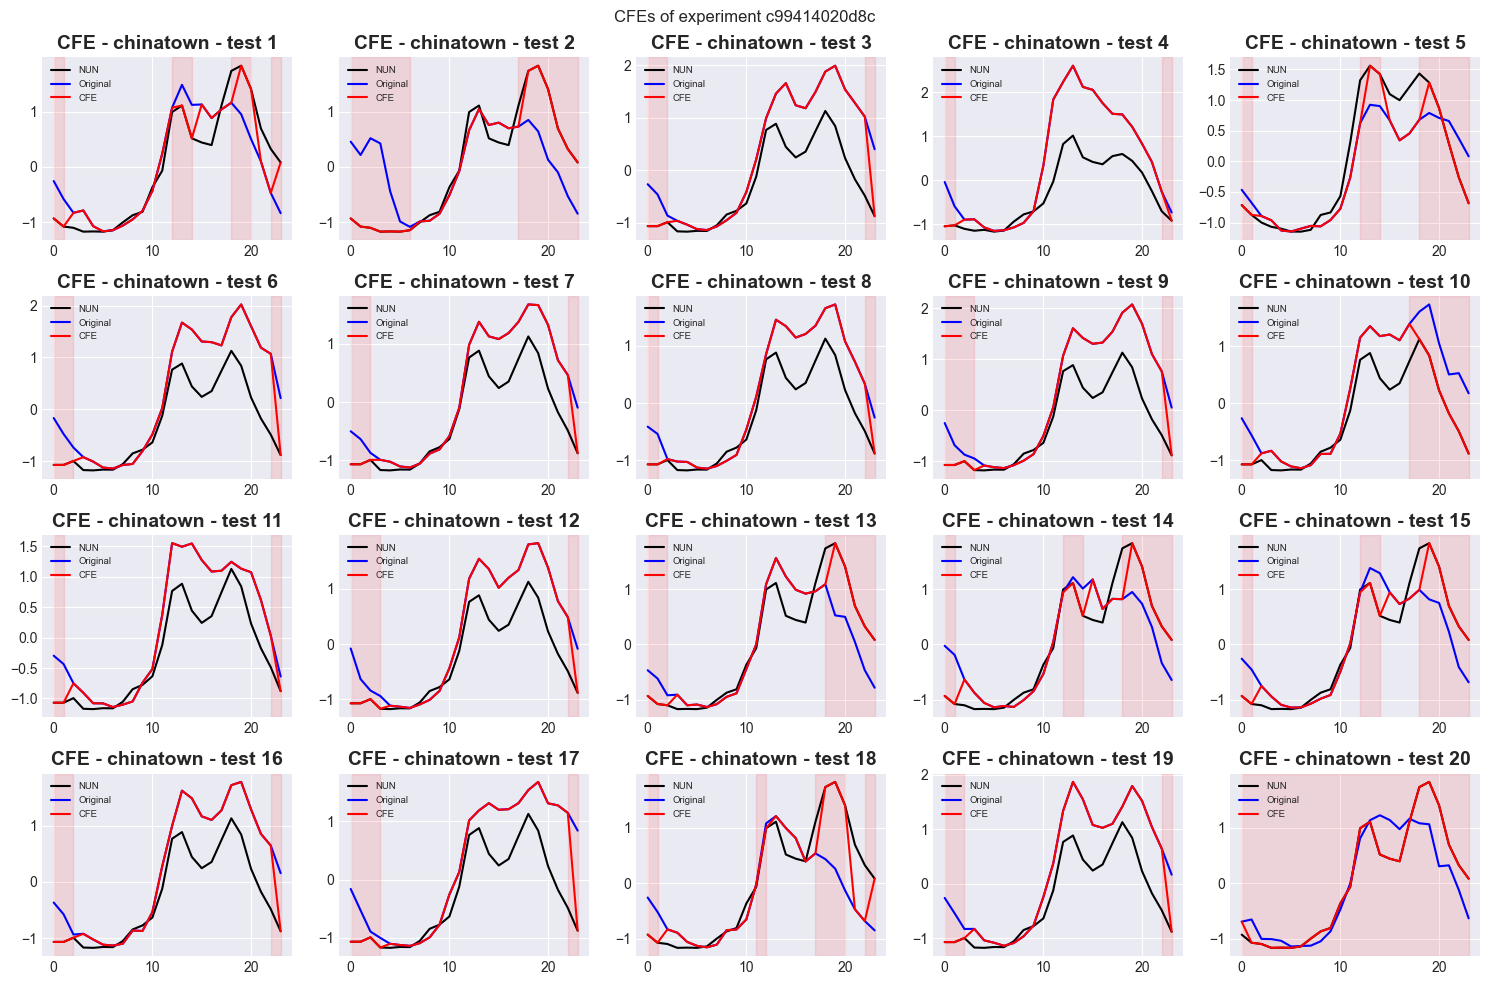

In [6]:
plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle(f'CFEs of experiment {experiment}')

for i in range(min(20, len(results))):
    orig = results.iloc[i]["sample"]
    nun = results.iloc[i]["nun"]
    mask = results.iloc[i]["mask"]
    plot_signal(X=orig, X2=nun, mask=mask, ax=axes[i], dataset=f"{data.name} - test {i+1}")
plt.tight_layout()
fig.savefig(f"./experiments/notebooks/cfes_{experiment}.png")